data: https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import scipy.stats
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

## Uniform Distribution

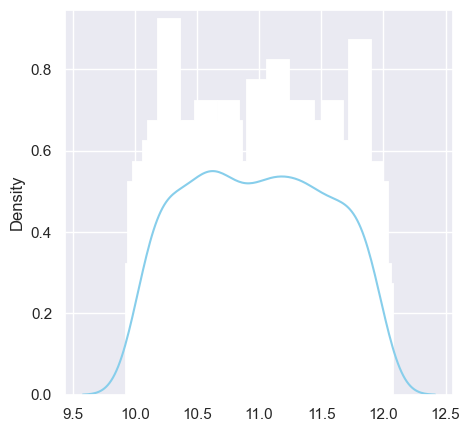

In [3]:
uniform_data = scipy.stats.uniform.rvs(loc=10, scale=2,size=1000)
ax = sns.distplot(uniform_data,
                bins=100,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth":15, 'alpha':1})

## Normal Distribution

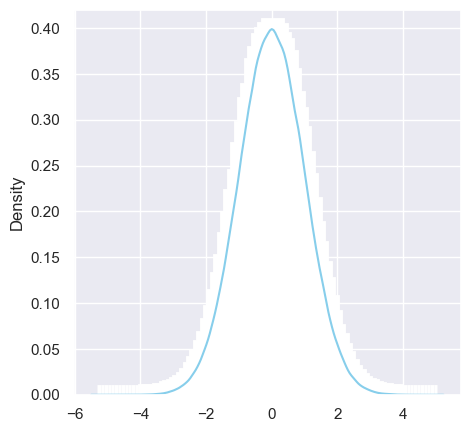

In [4]:
standard_normal_data = scipy.stats.norm.rvs(loc=0, scale=1,size=1000000)
ax = sns.distplot(standard_normal_data,
                bins=100,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth":15, 'alpha':1})

## Exponential Distribution

In [45]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1, loc=0, size=1000)

[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

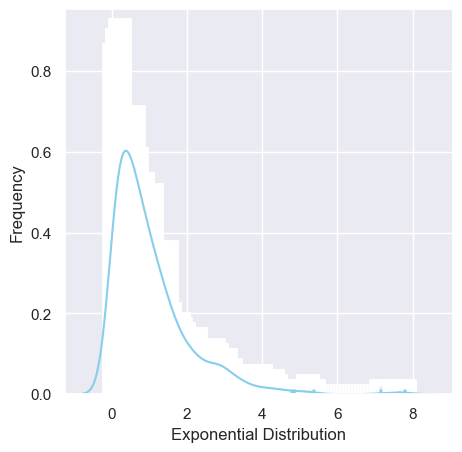

In [46]:
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15, 'alpha': 1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

## Poisson Distribution

In [47]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=1000)

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

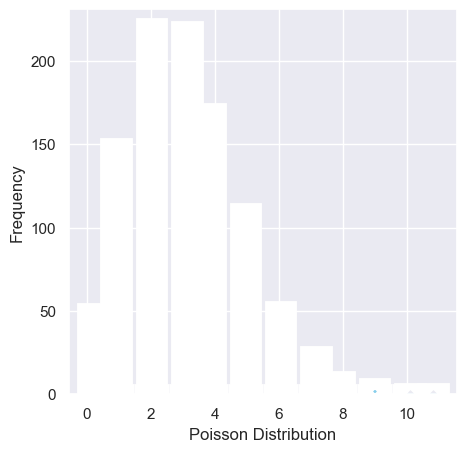

In [51]:
ax = sns.distplot(data_poisson,
                 bins=30,
                 kde=False,
                 color='skyblue',
                 hist_kws={"linewidth": 15, 'alpha': 1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## Binominal Distribution

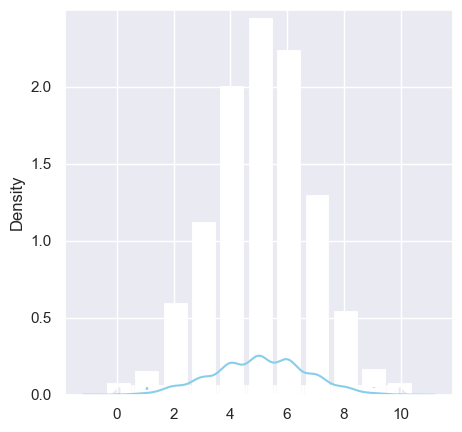

In [5]:
binom_data = scipy.stats.binom.rvs(n=10, p=0.5,size=1000)
ax = sns.distplot(binom_data,
                bins=100,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth":15, 'alpha':1})

## Inferential Statistics

In [6]:
data_normal = scipy.stats.norm.rvs(loc=0, scale=1, size=200)

In [7]:
means_of_means = []
for experiment in range(1000):
   resampled = np.random.choice(data_normal,size= len(data_normal), replace=True)
   means_of_means.append(np.mean(resampled))

In [8]:
len(means_of_means)

1000

In [9]:
np.mean(means_of_means)

0.092807252342579

In [10]:
lower_bound = np.quantile(means_of_means, 0.025)
upper_bound = np.quantile(means_of_means, 0.975)

In [11]:
print("95% CI of Population Mean: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Mean: (-0.05080004981938503, 0.23870782466433946)


In [12]:
np.std(means_of_means)

0.07633900709033475

In [13]:
lower_bound = np.mean(means_of_means) - np.std(means_of_means)*1.96
upper_bound = np.mean(means_of_means) + np.std(means_of_means)*1.96
print("95% CI of Population Mean: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Mean: (-0.056817201554477115, 0.24243170623963511)


## Using Formula

In [14]:
def standard_error_of_mean(data):
    s = np.std(data)
    nobs = len(data)
    return s/(nobs**0.5)

In [15]:
se = standard_error_of_mean(data_normal)
m = np.mean(data_normal)

In [16]:
lower_bound = m - se*1.96
upper_bound = m + se*1.96
print("95% CI of Population Mean: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Mean: (-0.05251143159391464, 0.24293163160846903)


## Proportion

In [18]:
import pandas as pd
data = pd.read_csv("data/heart.csv")

In [19]:
data["Sex_Category"] = data.sex.replace({1:"Male", 0:"Female"})

In [20]:
df = data[["Sex_Category", "target"]].dropna()

In [21]:
pd.crosstab(df.target, df.Sex_Category)

Sex_Category,Female,Male
target,,
0,86,413
1,226,300


In [22]:
p_fm = 226/(226+86)
n_fm = 86+226

In [23]:
p_fm

0.7243589743589743

In [24]:
se_fm = (p_fm*(1-p_fm)/n_fm)**0.5

In [25]:
se_fm

0.02529714756803247

In [26]:
lb = p_fm - 1.96*se_fm
up = p_fm + 1.96*se_fm
print("95% CI of Population Proportion: ({}, {})".format(lb, up))

95% CI of Population Proportion: (0.6747765651256307, 0.773941383592318)


In [27]:
data_normal


scipy.stats.norm.interval(alpha=0.95,
                          loc=np.mean(data_normal),
                          scale=scipy.stats.sem(data_normal))

(-0.05287940487860113, 0.24329960489315552)

In [28]:
uniform_data

scipy.stats.norm.interval(alpha=0.95,
                          loc=np.mean(uniform_data),
                          scale=scipy.stats.sem(uniform_data))

(10.952884973482297, 11.021670879602654)

## Hypothesis Testing

In [29]:
import statsmodels.api as sm

p adalah proporsi orang tua yang percaya elektronik menjadi penyebab kurang tidur remaja

H0: p = 0.52

H1: p > 0.52

ztest

alpha = 0.05

p-value

p-value > alpha --> Fail to Reject H0

p-value <= alpha --> Reject H0

In [30]:
n_obs = 1018
pnull = 0.52
pnew = 0.56

In [31]:
p_val = sm.stats.proportions_ztest(pnew*n_obs,nobs=n_obs,value=pnull,alternative='larger')[1]

In [32]:
p_val > 0.05

False

## Difference of Means

In [33]:
data = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv")
data.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


* H0: BMIm = BMIf
* H1: BMIm != BMIf

ztest

alpha = 0.05

In [34]:
females = data[data["RIAGENDR"] == 2]
males = data[data["RIAGENDR"] == 1]

In [35]:
nf = len(females)
meanf = females["BMXBMI"].mean()
sdf = females["BMXBMI"].std()

print(nf, meanf, sdf)

2976 29.93994565217392 7.753318809545674


In [36]:
nm = len(males)
meanm = males["BMXBMI"].mean()
sdm = males["BMXBMI"].std()

print(nm, meanm, sdm)

2759 28.778072111846942 6.2525676168014614


In [37]:
sm.stats.ztest(females["BMXBMI"].dropna(), males["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

In [38]:
p_val= 6.591544431126401e-10

In [39]:
p_val > 0.05

False

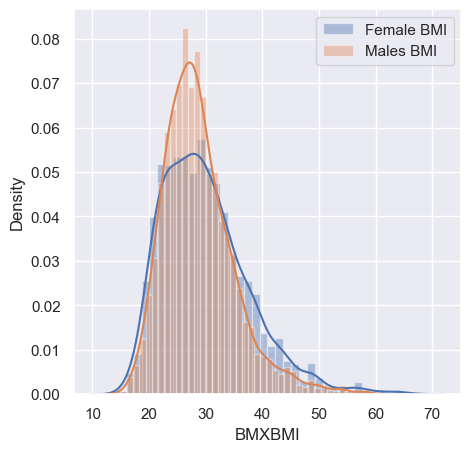

In [40]:
sns.distplot(females["BMXBMI"].dropna(),label="Female BMI")
sns.distplot(males["BMXBMI"].dropna(),label="Males BMI")
plt.legend()

## T-test

In [41]:
scipy.stats.ttest_ind(a=females["BMXBMI"].dropna(),
                       b=males["BMXBMI"].dropna(),
                       alternative='two-sided')

Ttest_indResult(statistic=6.175593353138321, pvalue=7.050275578094527e-10)

In [42]:
sample1 = scipy.stats.norm.rvs(loc=0.1, scale=1, size=10000)
sample2 = scipy.stats.norm.rvs(loc=0.15, scale=1, size=10000)

p = scipy.stats.ttest_ind(a=sample1,b=sample2, alternative='two-sided').pvalue

if p > 0.05:
    print("Probably From same distribution")
else:
    print("Probably diffrent distribution")

Probably From same distribution


## Chi-SQuared

H0: var1 tidak ada hubungan dengan var2

H1: ada hubungan antara dua variable

In [43]:
data= [
    [90,120,60],
    [70,100,60]
]

In [44]:
p = scipy.stats.chi2_contingency(data).pvalue

if p > 0.05:
    print("Probably Indipendent")
else:
    print("Probably Dependent")

Probably Indipendent
